In [1]:
## Importing the Dependecies/


In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Here the step is to avoid OOM Errors by setting GPU Memory consumption growth

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [5]:
## Removing the Dodgy Images

In [6]:
import cv2
import imghdr

In [7]:
img_ext = ['jpg','png','jpeg','bmp']

In [8]:
data_dir= 'data'

In [9]:
os.listdir(os.path.join(data_dir,'sad'))

['images26.jpg',
 'images32.jpg',
 'depositphotos_83965442-stock-photo-woman-silhouette-watching-sun-in.jpg',
 'image22.jpeg',
 'people-wallpaper-preview.jpg',
 '283-2838080_cartoon-sad-people-happy-and-sad-people-cartoon.png',
 'sad-quotes-about-life.jpg',
 'sad-people-icon-2CCHXB2.jpg',
 'dZ5aCmv8izKeDWcdohG2h7.jpg',
 '192px.svg',
 'dreamstime_s_101440985.jpg',
 'aid12707023-v4-1200px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'images33.jpg',
 'sue.jpg',
 'images27.jpg',
 'image18.jpeg',
 'man-portrait-contemplative-sad-looking-at-camera-732x549-thumbnail.jpg',
 'cd5dc5f4-390a-45c2-aa29-b9c51bd5d998-full21x9_GettyImages910827124.jpg',
 '640px-Crying-girl.jpg',
 'images31.jpg',
 'images25.jpg',
 'a-sad-woman-sitting-by-the-window.jpg',
 'images19.jpg',
 'closeup-headshot-very-sad-depressed-stressed-disappointed-gloomy-young-J4TMHR.jpg',
 'depositphotos_199881536-stock-photo-depressed-hispanic-girl-with-sad.jpg',
 '4ca85a8078ecffeb4e8258f3635451a2--sadness-photography-depression-photograph

In [10]:
import os
import cv2
import imghdr

# Looping over images
for img_class in os.listdir(data_dir):
    img_class_dir = os.path.join(data_dir, img_class)
    
    # Skip if the current item is not a directory
    if not os.path.isdir(img_class_dir):
        continue
    
    for image in os.listdir(img_class_dir):
        image_path = os.path.join(img_class_dir, image)
        
        try:
            # Process the image
            img = cv2.imread(image_path)
            
            # Check the file extension
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print('Image is not in the extension list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Image has an issue: {}'.format(image_path))


Image is not in the extension list: data/happy/192px.svg
Image is not in the extension list: data/happy/48.png
Image is not in the extension list: data/happy/.DS_Store
Image is not in the extension list: data/happy/25339958-group-of-happy-people-raising-hand-over-white-background.jpg
Image is not in the extension list: data/happy/vector.svg
Image is not in the extension list: data/happy/7-Habits-of-Happy-People.png
Image is not in the extension list: data/happy/vector9.svg
Image is not in the extension list: data/happy/hy-eating-and-people-concept-happy-full-man-touching-his-tummy-over-blue-sky.jpg
Image is not in the extension list: data/happy/full-body-two-young-happy-600w-168455318.jpg
Image is not in the extension list: data/happy/vector8.svg
Image is not in the extension list: data/happy/54859657-satisfaction-and-people-concept-happy-full-man-touching-his-tummy-over-gray-background.jpg
Image is not in the extension list: data/happy/vector3.svg
Image is not in the extension list: d

In [11]:
## Load Data

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 423 files belonging to 2 classes.
Metal device set to: Apple M1 Pro


In [13]:
data_itereator = data.as_numpy_iterator()

In [14]:
batch = data_itereator.next()

In [15]:
batch[0].shape

(32, 256, 256, 3)

In [16]:
# batch[0] - images and batch[1]-labels
batch[1]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

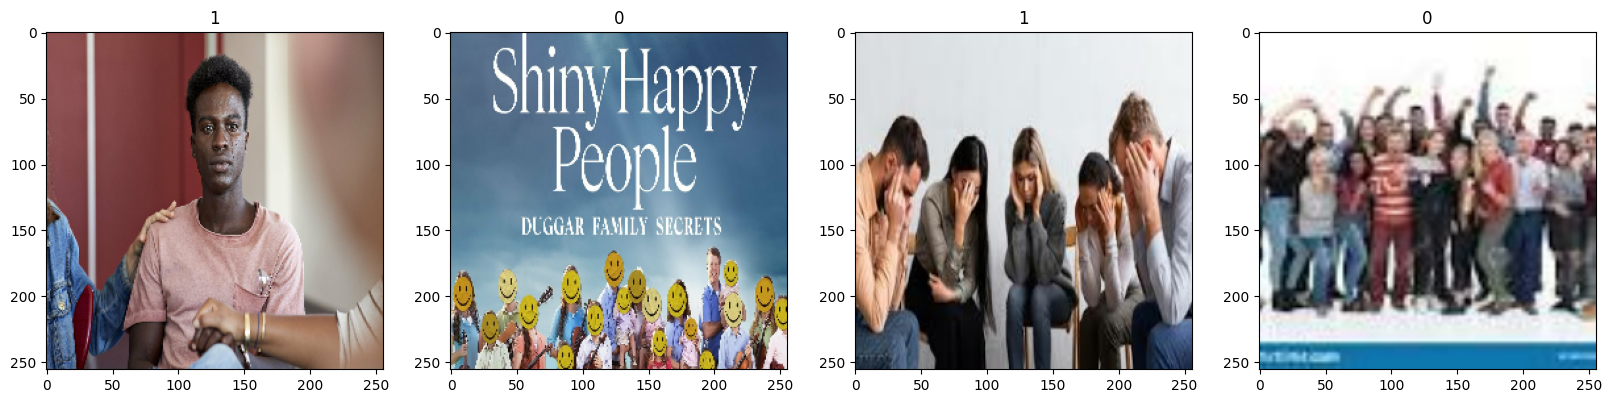

In [17]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
'''min value is - 0
max value is 255 so we'll process them between 0 to 1'''
scaled = batch[0]/255

In [19]:

scaled

array([[[[0.5529412 , 0.30980393, 0.3137255 ],
         [0.5568628 , 0.3137255 , 0.31764707],
         [0.55458385, 0.31144664, 0.3153682 ],
         ...,
         [0.38431373, 0.30588236, 0.2627451 ],
         [0.3764706 , 0.29803923, 0.25490198],
         [0.36507273, 0.28664136, 0.24350409]],

        [[0.5546262 , 0.31148896, 0.31541052],
         [0.5537837 , 0.31064644, 0.314568  ],
         [0.5505176 , 0.30738038, 0.31130195],
         ...,
         [0.38739276, 0.3089614 , 0.26582414],
         [0.3762481 , 0.2978167 , 0.25467944],
         [0.37229103, 0.29385966, 0.2507224 ]],

        [[0.5568628 , 0.3137255 , 0.31764707],
         [0.5529412 , 0.30980393, 0.3137255 ],
         [0.553776  , 0.3106388 , 0.31456035],
         ...,
         [0.3882353 , 0.30980393, 0.26666668],
         [0.38039216, 0.3019608 , 0.25882354],
         [0.38213444, 0.30370307, 0.26056582]],

        ...,

        [[0.32040566, 0.37651333, 0.45887798],
         [0.31335145, 0.40634638, 0.5583423 ]

# 2.Data Pre Processing

## 2.1 Scale the Data

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 423 files belonging to 2 classes.


In [21]:
data = data.map(lambda x,y : (x/255,y))

In [22]:
scaled_iter = data.as_numpy_iterator()


In [23]:
batch = scaled_iter.next()

In [24]:
batch[0].max()

1.0

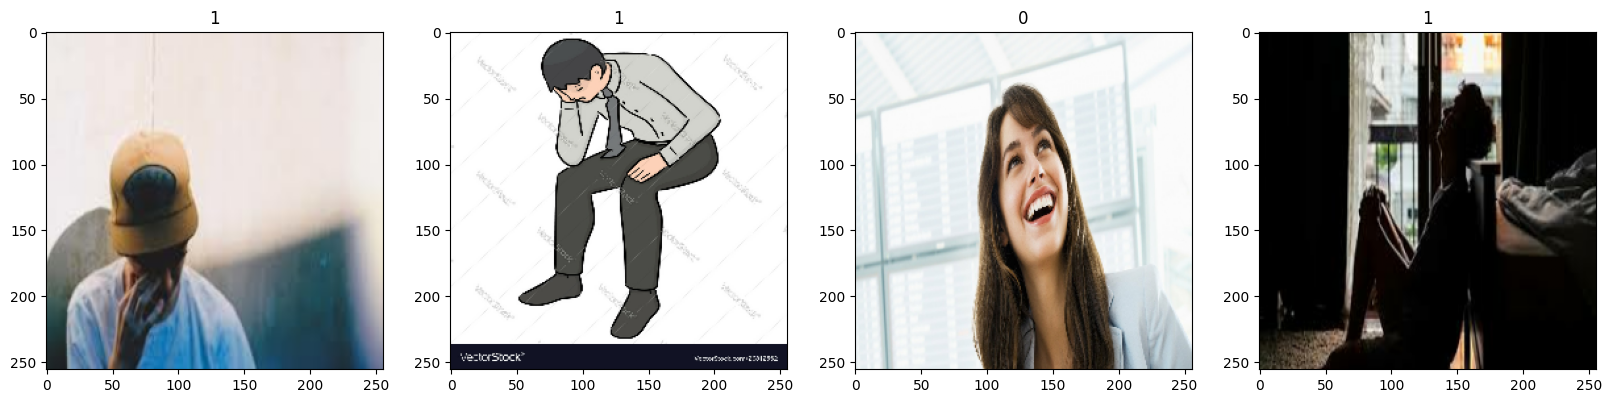

In [25]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [26]:
len(data)

14

In [27]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)+1
val_size = int(len(data)*.1)+1

In [28]:
val_size+test_size+train_size

14

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
len(val)

2

# 3.Deep Learning Model

## 3.1Building the Deeep Learning Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import TensorBoard



In [32]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Set the model to use GPU
    
        
        
    print("Model is fitting on GPU.")
else:
    print("No GPU available. Model is fitting on CPU.")


Model is fitting on GPU.


In [33]:
log_dir = 'logs'

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [36]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [38]:
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')


In [39]:
with tf.device('GPU:0'):
    hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])
    print("Model is fitting on GPU.")

Epoch 1/20
9/9 [==============================] - 8s 493ms/step - loss: 0.8346 - accuracy: 0.5208 - val_loss: 0.6492 - val_accuracy: 0.5156
Epoch 2/20
9/9 [==============================] - 7s 578ms/step - loss: 0.6459 - accuracy: 0.5312 - val_loss: 0.6157 - val_accuracy: 0.6875
Epoch 3/20
9/9 [==============================] - 6s 541ms/step - loss: 0.5972 - accuracy: 0.6944 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 4/20
9/9 [==============================] - 7s 614ms/step - loss: 0.5613 - accuracy: 0.7535 - val_loss: 0.5034 - val_accuracy: 0.7500
Epoch 5/20
9/9 [==============================] - 7s 566ms/step - loss: 0.4603 - accuracy: 0.8229 - val_loss: 0.4323 - val_accuracy: 0.8438
Epoch 6/20
9/9 [==============================] - 6s 563ms/step - loss: 0.3841 - accuracy: 0.8229 - val_loss: 0.2654 - val_accuracy: 0.9062
Epoch 7/20
9/9 [==============================] - 7s 577ms/step - loss: 0.2808 - accuracy: 0.9132 - val_loss: 0.2728 - val_accuracy: 0.8906
Epoch 8/20
9/9 [====

In [40]:
hist.history

{'loss': [0.8346462249755859,
  0.6459069848060608,
  0.5972009301185608,
  0.56129390001297,
  0.46033811569213867,
  0.38410434126853943,
  0.28083088994026184,
  0.244688481092453,
  0.16234321892261505,
  0.12693893909454346,
  0.07881525903940201,
  0.0610358864068985,
  0.09772951155900955,
  0.07611588388681412,
  0.030523959547281265,
  0.022894281893968582,
  0.011694248765707016,
  0.009192193858325481,
  0.0066102612763643265,
  0.013674176298081875],
 'accuracy': [0.5208333134651184,
  0.53125,
  0.6944444179534912,
  0.7534722089767456,
  0.8229166865348816,
  0.8229166865348816,
  0.9131944179534912,
  0.9236111044883728,
  0.9444444179534912,
  0.9756944179534912,
  0.9861111044883728,
  0.9826388955116272,
  0.9791666865348816,
  0.9861111044883728,
  0.9965277910232544,
  0.9965277910232544,
  1.0,
  1.0,
  1.0,
  0.9930555820465088],
 'val_loss': [0.6492496728897095,
  0.615736722946167,
  0.5906170606613159,
  0.503395140171051,
  0.43225374817848206,
  0.26537865400

## 3.3 Plot PERFORMANCE

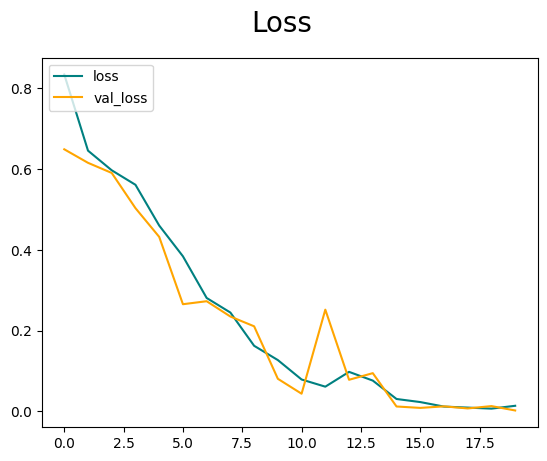

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label='loss')
plt.plot(hist.history['val_loss'],color = 'orange',label ='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

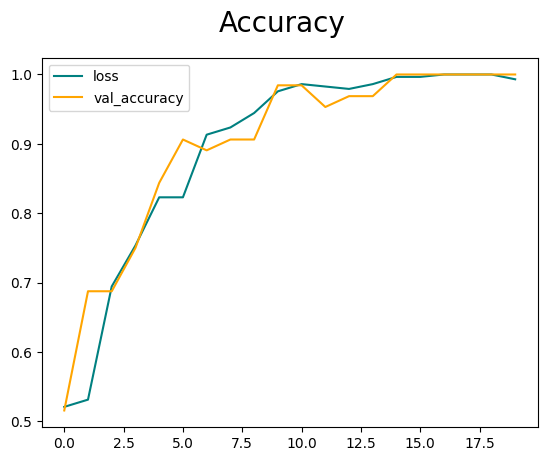

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label='loss')
plt.plot(hist.history['val_accuracy'],color = 'orange',label ='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [43]:
%load_ext tensorboard
%tensorboard --logdir=logs --port=6007


# 4 Evaluation

## 4.1 Evaluate

In [48]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [49]:
acc= BinaryAccuracy()
pre = Precision()
rec = Recall()

In [51]:
for batch in test.as_numpy_iterator():
    X,y = batch
    y_hat = model.predict(X)
    pre.update_state(y,y_hat)
    rec.update_state(y,y_hat)
    acc.update_state(y,y_hat)

1/1 [==============================] - 0s 324ms/step


In [54]:
print(f'Precision : {pre.result().numpy()},Accuracy:{acc.result().numpy()},Recall : {rec.result().numpy()}')

Precision : 1.0,Accuracy:1.0,Recall : 1.0


## 4.2 Test

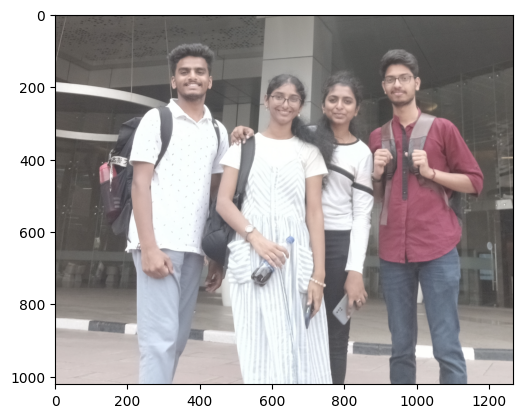

In [109]:
img = cv2.imread('/Users/nanda/Downloads/Telegram Downloads/neww/Screenshot 2023-06-19 at 8.25.16 PM.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

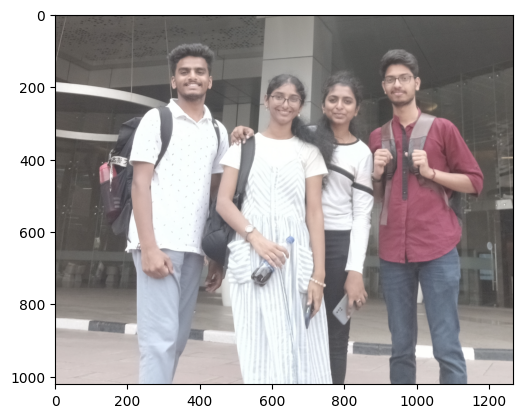

In [110]:
resize = tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 17ms/step


In [112]:
yhat


array([[0.03962143]], dtype=float32)

In [113]:
if (yhat>0.55):
    print("Predicted class is Sad")
else :
    print("Predicted class is Happy")

Predicted class is Happy


In [114]:
%reload_ext tensorboard
%tensorboard --logdir=logs --port=6007


Reusing TensorBoard on port 6007 (pid 43947), started 0:58:11 ago. (Use '!kill 43947' to kill it.)